## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=128, activation="relu")(input_layer)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0724 22:17:36.998356 10200 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 22:17:37.069167 10200 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 22:17:37.074154 10200 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.0001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0724 22:17:37.390309 10200 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 22:17:37.405267 10200 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.0606 - acc: 0.2646 - val_loss: 2.0486 - val_acc: 0.2665
Epoch 2/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.0353 - acc: 0.2774 - val_loss: 2.0248 - val_acc: 0.2841
Epoch 3/500
50000/50000 [==============================] - 4s 71us/step - loss: 2.0126 - acc: 0.2887 - val_loss: 2.0044 - val_acc: 0.2937
Epoch 4/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.9927 - acc: 0.2983 - val_loss: 1.9867 - val_acc: 0.2954
Epoch 5/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.9753 - acc: 0.3048 - val_loss: 1.9692 - val_acc: 0.3053
Epoch 6/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.9597 - acc: 0.3114 - val_loss: 1.9550 - val_acc: 0.3084
Epoch 7/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.9454 - acc: 0.3164 - val_loss: 1.9416 - 

50000/50000 [==============================] - 3s 61us/step - loss: 1.6981 - acc: 0.4081 - val_loss: 1.7072 - val_acc: 0.4018
Epoch 60/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6955 - acc: 0.4095 - val_loss: 1.7068 - val_acc: 0.3986
Epoch 61/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.6927 - acc: 0.4095 - val_loss: 1.7044 - val_acc: 0.4028
Epoch 62/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.6903 - acc: 0.4114 - val_loss: 1.7010 - val_acc: 0.4040
Epoch 63/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6876 - acc: 0.4125 - val_loss: 1.7019 - val_acc: 0.4025
Epoch 64/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.6850 - acc: 0.4124 - val_loss: 1.6972 - val_acc: 0.4038
Epoch 65/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.6828 - acc: 0.4133 - val_loss: 1.6933 - val_acc: 0.4068
Epoch 66/500
50000/50000 [==============

50000/50000 [==============================] - 3s 65us/step - loss: 1.5765 - acc: 0.4512 - val_loss: 1.5994 - val_acc: 0.4392
Epoch 118/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.5747 - acc: 0.4525 - val_loss: 1.5953 - val_acc: 0.4390
Epoch 119/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5731 - acc: 0.4529 - val_loss: 1.5968 - val_acc: 0.4362
Epoch 120/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.5714 - acc: 0.4529 - val_loss: 1.5945 - val_acc: 0.4363
Epoch 121/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.5695 - acc: 0.4549 - val_loss: 1.5913 - val_acc: 0.4394
Epoch 122/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.5684 - acc: 0.4546 - val_loss: 1.5922 - val_acc: 0.4378
Epoch 123/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.5665 - acc: 0.4546 - val_loss: 1.5891 - val_acc: 0.4419
Epoch 124/500
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 1.4925 - acc: 0.4805 - val_loss: 1.5320 - val_acc: 0.4585
Epoch 176/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4910 - acc: 0.4803 - val_loss: 1.5270 - val_acc: 0.4604
Epoch 177/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.4892 - acc: 0.4811 - val_loss: 1.5404 - val_acc: 0.4515
Epoch 178/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4888 - acc: 0.4819 - val_loss: 1.5288 - val_acc: 0.4578
Epoch 179/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.4867 - acc: 0.4828 - val_loss: 1.5385 - val_acc: 0.4550
Epoch 180/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4856 - acc: 0.4823 - val_loss: 1.5236 - val_acc: 0.4620
Epoch 181/500
50000/50000 [==============================] - 3s 66us/step - loss: 1.4842 - acc: 0.4845 - val_loss: 1.5234 - val_acc: 0.4604
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 3s 65us/step - loss: 1.4212 - acc: 0.5033 - val_loss: 1.4789 - val_acc: 0.4765
Epoch 234/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4197 - acc: 0.5036 - val_loss: 1.4791 - val_acc: 0.4759
Epoch 235/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4186 - acc: 0.5035 - val_loss: 1.4980 - val_acc: 0.4726
Epoch 236/500
50000/50000 [==============================] - 3s 65us/step - loss: 1.4176 - acc: 0.5039 - val_loss: 1.4846 - val_acc: 0.4748
Epoch 237/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.4164 - acc: 0.5040 - val_loss: 1.4801 - val_acc: 0.4773
Epoch 238/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.4155 - acc: 0.5033 - val_loss: 1.4777 - val_acc: 0.4759
Epoch 239/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4146 - acc: 0.5044 - val_loss: 1.4747 - val_acc: 0.4808
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 1.3606 - acc: 0.5241 - val_loss: 1.4467 - val_acc: 0.4870
Epoch 292/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3593 - acc: 0.5235 - val_loss: 1.4615 - val_acc: 0.4799
Epoch 293/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.3588 - acc: 0.5231 - val_loss: 1.4507 - val_acc: 0.4876
Epoch 294/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3577 - acc: 0.5233 - val_loss: 1.4557 - val_acc: 0.4810
Epoch 295/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3565 - acc: 0.5244 - val_loss: 1.4510 - val_acc: 0.4882
Epoch 296/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.3554 - acc: 0.5255 - val_loss: 1.4835 - val_acc: 0.4764
Epoch 297/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3550 - acc: 0.5261 - val_loss: 1.4421 - val_acc: 0.4862
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.3080 - acc: 0.5411 - val_loss: 1.4167 - val_acc: 0.4974
Epoch 350/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.3072 - acc: 0.5412 - val_loss: 1.4220 - val_acc: 0.4985
Epoch 351/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.3068 - acc: 0.5403 - val_loss: 1.4165 - val_acc: 0.4986
Epoch 352/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.3055 - acc: 0.5412 - val_loss: 1.4145 - val_acc: 0.4982
Epoch 353/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.3048 - acc: 0.5409 - val_loss: 1.4159 - val_acc: 0.4977
Epoch 354/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.3046 - acc: 0.5415 - val_loss: 1.4132 - val_acc: 0.4980
Epoch 355/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3032 - acc: 0.5411 - val_loss: 1.4222 - val_acc: 0.4959
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 3s 66us/step - loss: 1.2636 - acc: 0.5556 - val_loss: 1.4034 - val_acc: 0.5044
Epoch 408/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2621 - acc: 0.5557 - val_loss: 1.4064 - val_acc: 0.5072
Epoch 409/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.2620 - acc: 0.5565 - val_loss: 1.4151 - val_acc: 0.4963
Epoch 410/500
50000/50000 [==============================] - 3s 67us/step - loss: 1.2611 - acc: 0.5578 - val_loss: 1.4055 - val_acc: 0.5054
Epoch 411/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.2599 - acc: 0.5564 - val_loss: 1.4168 - val_acc: 0.4930
Epoch 412/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.2598 - acc: 0.5564 - val_loss: 1.4169 - val_acc: 0.5010
Epoch 413/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.2590 - acc: 0.5575 - val_loss: 1.4137 - val_acc: 0.4962
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 3s 70us/step - loss: 1.2212 - acc: 0.5708 - val_loss: 1.4211 - val_acc: 0.5014
Epoch 466/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2222 - acc: 0.5707 - val_loss: 1.3927 - val_acc: 0.5082
Epoch 467/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2222 - acc: 0.5703 - val_loss: 1.4084 - val_acc: 0.5009
Epoch 468/500
50000/50000 [==============================] - 4s 79us/step - loss: 1.2206 - acc: 0.5716 - val_loss: 1.3911 - val_acc: 0.5059
Epoch 469/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.2199 - acc: 0.5716 - val_loss: 1.3983 - val_acc: 0.5054
Epoch 470/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.2191 - acc: 0.5710 - val_loss: 1.4088 - val_acc: 0.5039
Epoch 471/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.2181 - acc: 0.5731 - val_loss: 1.4032 - val_acc: 0.5058
Epoch 472/500
50000/50000 [=======

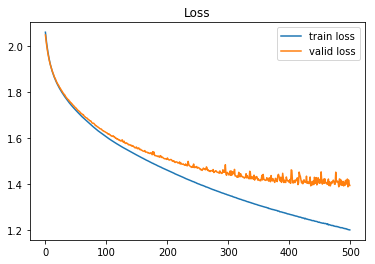

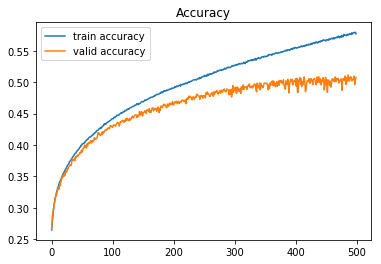

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()